# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Incorporated openweathermap to ease data retrieval
import openweathermapy.core as owm

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Establish base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?appid="

# Create dataframe to be added to in for loop
weatherDF = pd.DataFrame()
weatherDF["City"] = ""
weatherDF["Cloudiness"] = ""
weatherDF["Country"] = ""
weatherDF["Date"] = "" 
weatherDF["Humidity"] = ""
weatherDF["Lat"] = ""
weatherDF["Lng"] = ""
weatherDF["Max Temp"] = ""
weatherDF["Wind Speed"] = ""

# Print out the beginning of the retrieval notificaiton
print("Beginning Data Retrieval")
print("-------------------------------")

# Loop through all of the cities within the cities array
for x in np.arange(len(cities)):

    # Print processing of the current record along with city
    print(f"Processing record {x} | {cities[x]}")
    
    # Try these things
    try:
        
        # Request the current wheather statistics from built URL of the current city in JSON form
        currentWeather = requests.get(f"{base_url}{api_key}&q={cities[x]}&units=imperial").json()
        
        # Place all of the variables into the created dataframe
        weatherDF.loc[x, "City"] = currentWeather["name"]
        weatherDF.loc[x, "Cloudiness"] = currentWeather["clouds"]["all"]            
        weatherDF.loc[x, "Country"] = currentWeather["sys"]["country"]
        weatherDF.loc[x, "Date"] = currentWeather["dt"]
        weatherDF.loc[x, "Humidity"] = currentWeather["main"]["humidity"]
        weatherDF.loc[x, "Lat"] = currentWeather["coord"]["lat"]
        weatherDF.loc[x, "Lng"] = currentWeather["coord"]["lon"]
        weatherDF.loc[x, "Max Temp"] = currentWeather["main"]["temp_max"]
        weatherDF.loc[x, "Wind Speed"] = currentWeather["wind"]["speed"]
    
    # If previous block did not work display error message
    except (KeyError, IndexError):
        print("City not found. Skipping...")

# Print end of data retrieval process message
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

# Drop the rows that have been added with no data or partial data
cleanWeather = weatherDF.dropna()

Beginning Data Retrieval
-------------------------------
Processing record 0 | constitucion
Processing record 1 | rikitea
Processing record 2 | batagay-alyta
Processing record 3 | ushuaia
Processing record 4 | spokane
Processing record 5 | vaini
Processing record 6 | busselton
Processing record 7 | jamestown
Processing record 8 | pevek
Processing record 9 | rudersberg
Processing record 10 | borogontsy
Processing record 11 | kaka
Processing record 12 | shafranovo
Processing record 13 | karratha
Processing record 14 | yellowknife
Processing record 15 | bababe
City not found. Skipping...
Processing record 16 | flinders
Processing record 17 | punta arenas
Processing record 18 | verkhnevilyuysk
Processing record 19 | longyearbyen
Processing record 20 | albany
Processing record 21 | faanui
Processing record 22 | marystown
Processing record 23 | kodiak
Processing record 24 | east london
Processing record 25 | maghama
City not found. Skipping...
Processing record 26 | hokitika
Processing recor

Processing record 231 | raudeberg
Processing record 232 | araceli
Processing record 233 | bossembele
City not found. Skipping...
Processing record 234 | hunchun
Processing record 235 | dikson
Processing record 236 | tromso
Processing record 237 | katangli
Processing record 238 | coquimbo
Processing record 239 | vardo
Processing record 240 | warqla
City not found. Skipping...
Processing record 241 | castro
Processing record 242 | coetupo
City not found. Skipping...
Processing record 243 | kondagaon
Processing record 244 | namatanai
Processing record 245 | sangar
Processing record 246 | katsuura
Processing record 247 | richards bay
Processing record 248 | sitka
Processing record 249 | tabou
Processing record 250 | soto la marina
Processing record 251 | fort saint john
City not found. Skipping...
Processing record 252 | aklavik
Processing record 253 | senmonorom
City not found. Skipping...
Processing record 254 | wuwei
Processing record 255 | illoqqortoormiut
City not found. Skipping...
P

Processing record 450 | dragoman
Processing record 451 | portland
Processing record 452 | avera
Processing record 453 | blagoveshchenka
Processing record 454 | sept-iles
Processing record 455 | palabuhanratu
City not found. Skipping...
Processing record 456 | salinas
Processing record 457 | seoul
Processing record 458 | chililabombwe
Processing record 459 | ndele
City not found. Skipping...
Processing record 460 | guozhen
Processing record 461 | pangnirtung
Processing record 462 | san vicente
Processing record 463 | bograd
Processing record 464 | ulyanovo
City not found. Skipping...
Processing record 465 | havre
Processing record 466 | maniitsoq
Processing record 467 | wamba
Processing record 468 | honiara
Processing record 469 | kaohsiung
Processing record 470 | trelleborg
Processing record 471 | redlands
Processing record 472 | ilebo
Processing record 473 | nowogard
Processing record 474 | chagda
City not found. Skipping...
Processing record 475 | linxia
Processing record 476 | banja

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Output to data file previously defined
cleanWeather.to_csv(output_data_file)

# Display counts of each column
cleanWeather.count()

City          531
Cloudiness    531
Country       531
Date          531
Humidity      531
Lat           531
Lng           531
Max Temp      531
Wind Speed    531
dtype: int64

In [5]:
# Display the final dataframe
cleanWeather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Constitucion,0,MX,1541226397,79,23.99,-104.67,42.62,3.49
1,Rikitea,68,PF,1541226789,100,-23.12,-134.97,71.33,12.66
2,Batagay-Alyta,0,RU,1541226800,59,67.8,130.41,-14.27,4.05
3,Ushuaia,75,AR,1541224800,43,-54.81,-68.31,50,23.04
4,Spokane,90,US,1541224680,60,47.66,-117.42,50,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

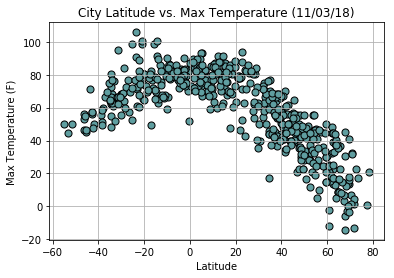

In [6]:
# Plot a scatter plot of latitude vs temperature with formatting
plt.scatter(cleanWeather["Lat"], cleanWeather["Max Temp"], color="cadetblue",
           edgecolors = "k", s = 50)

# Plot title and axis labels as well as the grid
plt.title("City Latitude vs. Max Temperature (11/03/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure to the output folder
plt.savefig("output_data/latVtemp.png")

#### Latitude vs. Humidity Plot

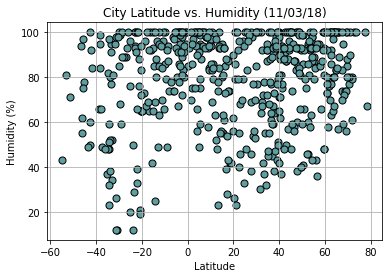

In [7]:
# Plot a scatter plot of latitude vs humidity with formatting
plt.scatter(cleanWeather["Lat"], cleanWeather["Humidity"],color="cadetblue",
           edgecolors = "k", s = 50)

# Plot title and axis labels as well as the grid
plt.title("City Latitude vs. Humidity (11/03/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure to the output folder
plt.savefig("output_data/latVhum.png")

#### Latitude vs. Cloudiness Plot

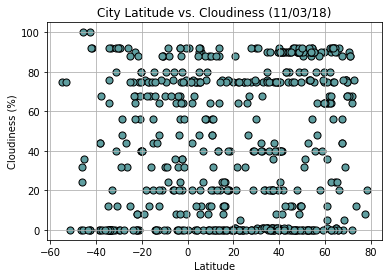

In [8]:
# Plot a scatter plot of latitude vs cloudiness with formatting
plt.scatter(cleanWeather["Lat"], cleanWeather["Cloudiness"],color="cadetblue",
           edgecolors = "k", s = 50)

# Plot title and axis labels as well as the grid
plt.title("City Latitude vs. Cloudiness (11/03/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure to the output folder
plt.savefig("output_data/latVcloud.png")

#### Latitude vs. Wind Speed Plot

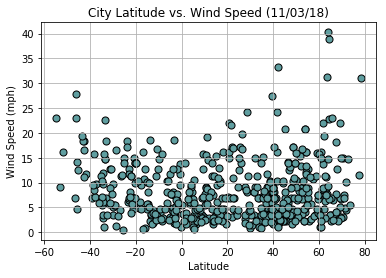

In [9]:
# Plot a scatter plot of latitude vs wind speed with formatting
plt.scatter(cleanWeather["Lat"], cleanWeather["Wind Speed"],color="cadetblue",
           edgecolors = "k", s = 50)

# Plot title and axis labels as well as the grid
plt.title("City Latitude vs. Wind Speed (11/03/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save the figure to the output folder
plt.savefig("output_data/latVwind.png")